# Learning keras with Nathaniel Tucker

Notebook dedicated to follow the awesome serie of keras videos created by Nathaniel Tucker.

Tucker's Youtube channel: https://www.youtube.com/channel/UCQTQ0AbOupKNxKKY-_x46OQ

Tucker's Github repo: https://github.com/knathanieltucker/a-bit-of-deep-learning-and-keras/

I can't thank him enough for his videos and his reponses to my questions on them. This material is just me running his notebooks.

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import libraries:

In [3]:
import tensorflow as tf

In [8]:
tf.keras?

# 1. Introduction and Installation

## Keras: Deep Learning library for Theano and TensorFlow

Keras is a high-level neural networks API, written in Python and capable of running on top of either TensorFlow or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

### Guiding principles

- User friendliness. Keras is an API designed for human beings, not machines. It puts user experience front and center. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
- Modularity. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as little restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.
- Easy extensibility. New modules are simple to add (as new classes and functions), and existing modules provide ample examples. To be able to easily create new modules allows for total expressiveness, making Keras suitable for advanced research.
- Work with Python. No separate models configuration files in a declarative format. Models are described in Python code, which is compact, easier to debug, and allows for ease of extensibility.


### Getting started

The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

We will only very breifly touch on the Sequential model because the functional model is much more expressive and frankly easier to use.

In [9]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


In [10]:
# quickly grab the data
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 2us/step


In [13]:
x_train.shape, y_train.shape

((404, 13), (404,))

404 samples with 13 dimensions

In [14]:
x_test.shape, y_test.shape

((102, 13), (102,))

Construct your model with a couple of layers:

In [15]:
from keras.layers import Dense

model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

Once the model is created, you will need to compile it (and specify some opitonal params):

In [16]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

You fit your model:

In [22]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=20, batch_size=404)

Epoch 1/20
404/404 [==============================] - 0s 11us/step - loss: 173.9312 - mean_absolute_percentage_error: 44.8552
Epoch 2/20
404/404 [==============================] - 0s 7us/step - loss: 164.6236 - mean_absolute_percentage_error: 44.1456
Epoch 3/20
404/404 [==============================] - 0s 7us/step - loss: 156.3709 - mean_absolute_percentage_error: 43.6080
Epoch 4/20
404/404 [==============================] - 0s 7us/step - loss: 149.1620 - mean_absolute_percentage_error: 43.2081
Epoch 5/20
404/404 [==============================] - 0s 11us/step - loss: 142.9950 - mean_absolute_percentage_error: 43.0268
Epoch 6/20
404/404 [==============================] - 0s 9us/step - loss: 137.8471 - mean_absolute_percentage_error: 43.1045
Epoch 7/20
404/404 [==============================] - 0s 5us/step - loss: 133.6082 - mean_absolute_percentage_error: 43.2856
Epoch 8/20
404/404 [==============================] - 0s 10us/step - loss: 130.2039 - mean_absolute_percentage_error: 43.54

As you fit your model, the loss goes down i.e. you are better able to predict what's gonna happen

We can easily check by evaluating on the test set:

In [23]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

102/102 [==============================] - 0s 18us/step


In [26]:
loss_and_metrics

[137.73875427246094, 54.496906280517578]

In addition to this, you can always use your model to make predictions in the future:

In [24]:
prices = model.predict(x_test, batch_size=128)

In [25]:
prices[:5]

array([[ 21.46040154],
       [ 25.13182068],
       [ 18.57298088],
       [ 22.7492218 ],
       [ 19.2775898 ]], dtype=float32)

# 2. Datasets

## Boston housing price regression dataset

Dataset taken from the StatLib library which is maintained at Carnegie Mellon University.

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

This is the only REGRESSION dataset!

In [1]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape

Using TensorFlow backend.


(404, 13)

If it is the first time that you are loading the dataset, it will download the data for you and store it in ~/.keras/datasets/

In [2]:
boston_housing.get_file?

In [3]:
x_train[0], y_train[0]

(array([   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
           6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
          21.     ,  396.9    ,   18.72   ]), 15.199999999999999)

## CIFAR10 small image classification

Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [31]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [32]:
cifar10.load_data?

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
i = 0 # first image
img = x_test[i]

In [35]:
img.shape

(32, 32, 3)

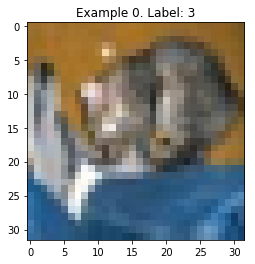

In [37]:
plt.title('Example %d. Label: %d' % (i, y_test[i]))
plt.imshow(img, cmap=plt.cm.gray_r)

## CIFAR100 small image classification

Dataset of 50,000 32x32 color training images, labeled over 100 categories, and 10,000 test images.

## MNIST database of handwritten digits

Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [38]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape

(60000, 28, 28)

In [40]:
i = 0
img = x_test[i]
img.shape

(28, 28)

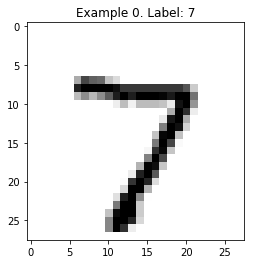

In [42]:
plt.title('Example %d. Label: %d' % (i, y_test[i]))
plt.imshow(img, cmap=plt.cm.gray_r)

The next two are going to be Natural Language Processing datasets:

## IMDB Movie reviews sentiment classification

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [6]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb_full.pkl",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

x_train.shape

17473536/17464789 [==============================] - 3s 0us/step


(25000,)

Notice the second shape is sort of None, it means it can be varied!

In [15]:
%pprint

Pretty printing has been turned OFF


So it does not print the array items one per line!

In [16]:
x_train[0], y_train[0]

([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12], 3)

Notice the data is already tokenized for us, we will talk more about this on the Preprocessing section!

## Reuters newswire topics classification

Dataset of 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

In [8]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.pkl",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

x_train.shape

2121728/2110848 [==============================] - 1s 0us/step


(8982,)

In [11]:
x_train[0], y_train[0]

([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12], 3)

Datasets stored in ~/.keras/datasets/

In [17]:
ls -l ~/.keras/datasets/

total 393808
-rw-r--r--   1 dazconap  staff      57026 Nov 13 15:04 boston_housing.npz
drwxr-xr-x  10 dazconap  staff        340 Jun  4  2009 cifar-10-batches-py/
-rw-r--r--   1 dazconap  staff  170498071 Nov 20 11:46 cifar-10-batches-py.tar.gz
-rw-r--r--   1 dazconap  staff   17464789 Nov 20 11:47 imdb_full.pkl
-rw-r--r--   1 dazconap  staff   11490434 Nov 20 11:47 mnist.npz
-rw-r--r--   1 dazconap  staff    2110848 Nov 20 11:49 reuters.pkl
